In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pearc19_model import pop_dyn

/home/mbb/anaconda3/lib/python3.7/site-packages/pearc19_model-0.0.0-py3.7.egg/pearc19_model/basic.py:64: RuntimeWarning: overflow encountered in double_scalars
  M[i+1] = M[i] + (M[i]*brM - M[i]*dfM*W[i])*time_step
/home/mbb/anaconda3/lib/python3.7/site-packages/pearc19_model-0.0.0-py3.7.egg/pearc19_model/basic.py:65: RuntimeWarning: overflow encountered in double_scalars
  W[i+1] = W[i] -(W[i]*brW*M[i] - W[i]*dfW)*time_step


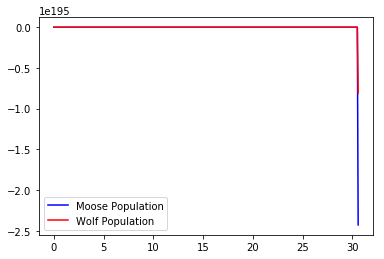

In [2]:
t,M,W = pop_dyn(ipM=500, ipW=20)
    
# Plot the moose population
plt.plot(t, M, color = "b", label = "Moose Population")
plt.plot(t, W, color = "r", label = "Wolf Population")

plt.legend()
plt.show()